In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes = pd.read_csv('datasets_diabetes.csv')
print(diabetes.columns)
diabetes.head()


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))
print(diabetes.groupby('Outcome').size())

dimension of diabetes data: (768, 9)
Outcome
0    500
1    268
dtype: int64


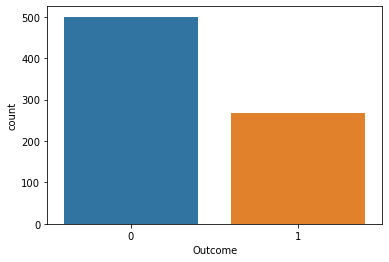

In [ ]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [ ]:
from sklearn.model_selection import train_test_split

X = diabetes.loc[:, diabetes.columns != 'Outcome']
y = diabetes['Outcome']


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.33,
    stratify=diabetes['Outcome'], # data is split in a stratified fashion, using this as the class labels.
    random_state=66)#Controls the shuffling applied to the data before applying the split

In [ ]:
from sklearn import svm
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.770
Accuracy on test set: 0.791


In [ ]:
svc = svm.SVC(C=10)
#C, default=1.0
#Regularization parameter. The strength of the regularization is inversely proportional to C. 
#Must be strictly positive. The penalty is a squared l2 penalty.
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.780
Accuracy on test set: 0.756


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       165
           1       0.75      0.56      0.64        89

    accuracy                           0.78       254
   macro avg       0.77      0.73      0.74       254
weighted avg       0.78      0.78      0.77       254


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       165
           1       0.75      0.56      0.64        89

 